In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def create_statistics(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Calculate statistics
    statistics = {
        'Total Rows': len(df),
        'Total Columns': len(df.columns),
        'Column Names': df.columns.tolist(),
        'Missing Values': df.isnull().sum().to_dict(),
        'Data Types': df.dtypes.to_dict(),
        'Summary Statistics': df.describe().to_dict()
    }
    
    # Generate graphs
    for column in df.columns[1:]:  
        if df[column].dtype in ['int64', 'float64']:
            df[column].plot(kind='hist', title=column)
            plt.axvline(df[column].quantile(0.25), color='r', linestyle='--', label='25th Percentile')
            plt.axvline(df[column].quantile(0.5), color='g', linestyle='--', label='50th Percentile')
            plt.axvline(df[column].quantile(0.75), color='b', linestyle='--', label='75th Percentile')
            plt.legend()
            plt.show()
        elif df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            value_counts.plot(kind='bar', title=column)
            plt.show()
    
    return statistics

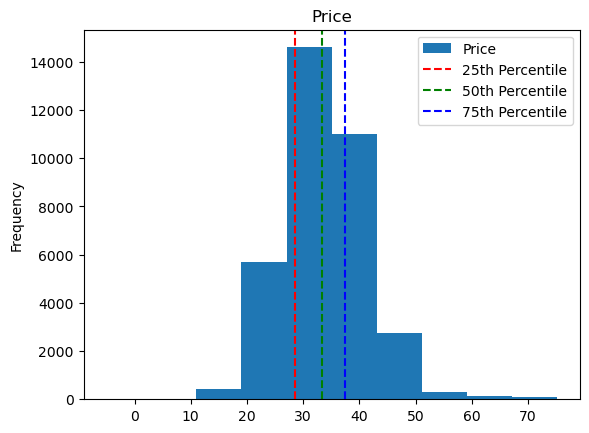

{'Total Rows': 35040, 'Total Columns': 2, 'Column Names': ['Unnamed: 0', 'Price'], 'Missing Values': {'Unnamed: 0': 0, 'Price': 0}, 'Data Types': {'Unnamed: 0': dtype('O'), 'Price': dtype('float64')}, 'Summary Statistics': {'Price': {'count': 35040.0, 'mean': 33.498725736717816, 'std': 7.238710698802374, 'min': -5.058333333333337, '25%': 28.49, '50%': 33.3, '75%': 37.44, 'max': 75.19}}}


In [29]:
csv_file = '/Users/kanan/Desktop/Thesis - Electrolyzer market participation/Flexable_industrial_h2/output/2016/EOM_Prices_w:o_electrolyzer.csv'
statistics = create_statistics(csv_file)
print(statistics)